<h2> Pre processing the diuresis dataset</h2>

Here, we first import the required libraries<br>
Then, we define a function whihc lates us select our window based on the steps taken.<br>
Eg-> If our steps are 3, then we take the 1st,2nd,3rd column and predict the 4th column values.<br>
<tbsp>We then take the 2nd,3rd,4th column and predict the 5th column values.<br>
    <tbsp>We then take the 4th,5th,6th column and predict the 7th column values<br<br>
        The LSTM model is trained like this. So when we input the 5th,6th,7th column, the LSTM model gives out the 8th column(27th March) valies
        <br><br>
        For example, given the current time (t) we want to predict the value at the next time in the sequence (t+1), we can use the current time (t), as well as the two prior times (t-1 and t-2) as input variables.

When phrased as a regression problem, the input variables are t-2, t-1, t and the output variable is t+1.

In [1]:
from numpy import array
from numpy import hstack
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
import pandas as pd
import numpy as np


def split_sequences(sequences, n_steps):
    x, y = list(), list()
    for i in range(len(sequences)):
        
        end_ix = i + n_steps
        # check if we are beyond the dataset
        if end_ix > len(sequences)-1:
            break
        # gather input and output parts of the pattern
        seq_x, seq_y = sequences[i:end_ix, :], sequences[end_ix, :]
        X.append(seq_x)
    y.append(seq_y)
    return array(X), array(y)


Using TensorFlow backend.


In [2]:
df = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Train_dataset.xlsx", sheet_name = "Diuresis_TS")

We read the excel file and drop the people ID column as it has no relation with diuresis values

In [3]:
df=df.drop('people_ID',axis=1)

In [4]:
du_X=df.iloc[:,:].values

In [5]:
du_X

array([[ 441.      ,  544.2     ,  669.64    , ..., 1002.2416  ,
        1215.68992 , 1472.627904],
       [ 151.      ,  197.2     ,  253.24    , ...,  399.9256  ,
         492.91072 ,  606.892864],
       [ 416.      ,  515.2     ,  632.44    , ...,  947.7736  ,
        1150.32832 , 1395.793984],
       ...,
       [ 177.      ,  228.4     ,  288.28    , ...,  448.4632  ,
         551.15584 ,  676.787008],
       [ 352.      ,  438.4     ,  542.68    , ...,  814.6792  ,
         990.61504 , 1204.138048],
       [ 181.      ,  230.2     ,  290.44    , ...,  455.2936  ,
         559.35232 ,  686.622784]])

We transpose the input matrix for it to be easier to read for the lSTM model

In [6]:
du_X=du_X.transpose()

In [7]:
def matprint(mat, fmt="g"):
    col_maxes = [max([len(("{:"+fmt+"}").format(x)) for x in col]) for col in mat.T]
    for x in mat:
        for i, y in enumerate(x):
            print(("{:"+str(col_maxes[i])+fmt+"}").format(y), end="  ")
        print("")

In [8]:
du_X

array([[ 441.      ,  151.      ,  416.      , ...,  177.      ,
         352.      ,  181.      ],
       [ 544.2     ,  197.2     ,  515.2     , ...,  228.4     ,
         438.4     ,  230.2     ],
       [ 669.64    ,  253.24    ,  632.44    , ...,  288.28    ,
         542.68    ,  290.44    ],
       ...,
       [1002.2416  ,  399.9256  ,  947.7736  , ...,  448.4632  ,
         814.6792  ,  455.2936  ],
       [1215.68992 ,  492.91072 , 1150.32832 , ...,  551.15584 ,
         990.61504 ,  559.35232 ],
       [1472.627904,  606.892864, 1395.793984, ...,  676.787008,
        1204.138048,  686.622784]])

In [9]:
n_steps = 3

We use the function mentioned above to split the sequences based on the number of steps

In [10]:
X, Y = split_sequences(du_X, n_steps)

In [11]:
n_features = X.shape[2]

print(X.shape[2])
print(X)

10714
[[[ 441.       151.       416.      ...  177.       352.       181.     ]
  [ 544.2      197.2      515.2     ...  228.4      438.4      230.2    ]
  [ 669.64     253.24     632.44    ...  288.28     542.68     290.44   ]]

 [[ 544.2      197.2      515.2     ...  228.4      438.4      230.2    ]
  [ 669.64     253.24     632.44    ...  288.28     542.68     290.44   ]
  [ 821.368    321.688    776.728   ...  362.136    665.816    366.328  ]]

 [[ 669.64     253.24     632.44    ...  288.28     542.68     290.44   ]
  [ 821.368    321.688    776.728   ...  362.136    665.816    366.328  ]
  [1002.2416   399.9256   947.7736  ...  448.4632   814.6792   455.2936 ]]

 [[ 821.368    321.688    776.728   ...  362.136    665.816    366.328  ]
  [1002.2416   399.9256   947.7736  ...  448.4632   814.6792   455.2936 ]
  [1215.68992  492.91072 1150.32832 ...  551.15584  990.61504  559.35232]]]


In [12]:
Y

array([[ 821.368   ,  321.688   ,  776.728   , ...,  362.136   ,
         665.816   ,  366.328   ],
       [1002.2416  ,  399.9256  ,  947.7736  , ...,  448.4632  ,
         814.6792  ,  455.2936  ],
       [1215.68992 ,  492.91072 , 1150.32832 , ...,  551.15584 ,
         990.61504 ,  559.35232 ],
       [1472.627904,  606.892864, 1395.793984, ...,  676.787008,
        1204.138048,  686.622784]])

<h2>Defining the Model</h2>
<br>
The model is a basic sequential model, with input shape as the number of steps and features whihc is 3 and 10714 respectively. The number of features is taken as the count of all rows in the dataset, as we have the calulate the time series value for each row in the dataset
<br>
We add another recurrent LSTM layer, and then add a dense layer
<br>A fully connected layer that often follows LSTM layers and is used for outputting a prediction is called Dense().



In [14]:
# define model
model = Sequential()
model.add(LSTM(100, activation='relu', return_sequences=True, input_shape=(n_steps, n_features)))
model.add(LSTM(100, activation='relu'))
model.add(Dense(n_features))
model.compile(optimizer='adam', loss='mse')
# fit model
model.fit(X, Y, epochs=400, verbose=0)



<h3>Predicting the diuresis value for 27th March</h3>
<br>As we need the diuresis value for the 7th column, and we know n_steps is 3, we take the 4th,5th,6th columns as input

In [15]:
x_input=du_X[4:7,:]

In [16]:
x_input

array([[1002.2416  ,  399.9256  ,  947.7736  , ...,  448.4632  ,
         814.6792  ,  455.2936  ],
       [1215.68992 ,  492.91072 , 1150.32832 , ...,  551.15584 ,
         990.61504 ,  559.35232 ],
       [1472.627904,  606.892864, 1395.793984, ...,  676.787008,
        1204.138048,  686.622784]])

We reshape our input array to fit to the model properly and then predict the values

In [17]:
x_input = x_input.reshape((1, n_steps, n_features))
yhat = model.predict(x_input, verbose=0)

The yhat values predicted are the diuresis values for the 27th of March, which we will then put in the training dataset and run the Neural Network again to train

In [18]:
yhat

array([[1889.2659 ,  751.01953, 1737.0127 , ...,  907.0017 , 1485.1157 ,
         849.7351 ]], dtype=float32)

<h2> From here the procedure is similar to question 1.</h2> However, one small change is there, we replace the original diuresis value in the training dataset, with the new diuresis values calculated for 27th March

In [19]:
from keras.callbacks import ModelCheckpoint
from keras.models import Sequential
from keras.layers import Dense, Activation, Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error 
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.metrics import mean_absolute_error, mean_squared_error
from matplotlib import pyplot as plt
import seaborn as sb
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import warnings 
warnings.filterwarnings('ignore')
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [20]:
traindf = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Train_dataset.xlsx", sheet_name = "Train_dataset")
testdf = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Test_dataset.xlsx", sheet_name = "Test_dataset")

In [21]:
traindf=traindf.drop('Name',axis=1)
traindf=traindf.drop('Designation',axis=1)
traindf=traindf.drop('people_ID',axis=1)
traindf=traindf.drop('Region',axis=1)
traindf=traindf.drop('Occupation',axis=1)
traindf=traindf.drop('Insurance',axis=1)
traindf=traindf.drop('salary',axis=1)

testdf=testdf.drop('Name',axis=1)
testdf=testdf.drop('Designation',axis=1)
testdf=testdf.drop('people_ID',axis=1)
testdf=testdf.drop('Region',axis=1)
testdf=testdf.drop('Occupation',axis=1)
testdf=testdf.drop('Insurance',axis=1)
testdf=testdf.drop('salary',axis=1)

In [22]:
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(strategy='most_frequent')
imp_mean.fit(traindf)
traindf = imp_mean.transform(traindf)

In [23]:
traindf_X=traindf[:,:-1]
traindf_Y=traindf[:,-1]

In [24]:
np.set_printoptions(threshold=np.inf)

In [25]:
for i in range(len(traindf_X)):
    traindf_X[i,9]=int(traindf_X[i,9][1:])


In [26]:
labelEncoder_X=LabelEncoder()
traindf_X[:,0]=labelEncoder_X.fit_transform(traindf_X[:,0])
traindf_X[:,1]=labelEncoder_X.fit_transform(traindf_X[:,1])



In [27]:
traindf_X

array([[0, 1, 1.0, 'Public', 2, 0, 'Hypertension', 68, 8, 400, 'Normal',
        441.0, 154.0, 93.0, 233.0, 82.0, 58.0, 27, 7, 2.0],
       [0, 1, 2.0, 'Walk', 2, 0, 'Diabetes', 64, 15, 100, 'Stage-02',
        390.0, 121.0, 56.0, 328.0, 89.0, 68.0, 5, 6, 1.0],
       [0, 0, 1.0, 'Public', 2, 0, 'None', 19, 13, 300, 'Elevated',
        416.0, 124.0, 137.0, 213.0, 77.0, 43.0, 40, 6, 1.0],
       [0, 1, 1.0, 'Car', 2, 0, 'Coronary Heart Disease', 33, 9, 200,
        'Stage-01', 410.0, 98.0, 167.0, 275.0, 64.0, 60.0, 27, 7, 1.0],
       [0, 0, 2.0, 'Car', 2, 0, 'Diabetes', 23, 7, 400, 'Normal', 390.0,
        21.0, 153.0, 331.0, 71.0, 64.0, 32, 7, 1.0],
       [0, 1, 1.0, 'Public', 2, 0, 'None', 35, 9, 100, 'Stage-02', 389.0,
        139.0, 86.0, 216.0, 94.0, 38.0, 5, 5, 2.0],
       [0, 1, 2.0, 'Car', 2, 0, 'Coronary Heart Disease', 61, 3, 400,
        'Normal', 390.0, 75.0, 156.0, 311.0, 99.0, 68.0, 23, 5, 1.0],
       [0, 1, 1.0, 'Public', 2, 0, 'Diabetes', 49, 10, 200, 'Stage-01',
   

In [28]:
data=['Gender', 'Married', 'Children', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month']

In [29]:
traindf_X=pd.DataFrame(data=traindf_X,columns=data)

In [30]:
traindf_X

,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,0,1,1,Public,2,0,Hypertension,68,8,400,Normal,441,154,93,233,82,58,27,7,2
1,0,1,2,Walk,2,0,Diabetes,64,15,100,Stage-02,390,121,56,328,89,68,5,6,1
2,0,0,1,Public,2,0,None,19,13,300,Elevated,416,124,137,213,77,43,40,6,1
3,0,1,1,Car,2,0,Coronary Heart Disease,33,9,200,Stage-01,410,98,167,275,64,60,27,7,1
4,0,0,2,Car,2,0,Diabetes,23,7,400,Normal,390,21,153,331,71,64,32,7,1
5,0,1,1,Public,2,0,None,35,9,100,Stage-02,389,139,86,216,94,38,5,5,2
6,0,1,2,Car,2,0,Coronary Heart Disease,61,3,400,Normal,390,75,156,311,99,68,23,5,1
7,0,1,1,Public,2,0,Diabetes,49,10,200,Stage-01,194,123,179,242,82,59,34,3,0
8,0,1,2,Public,2,0,Hypertension,44,6,200,Stage-01,310,125,156,224,60,37,21,7,0
9,0,1,1,Public,2,0,None,41,14,300,Elevated,242,23,178,277,83,58,28,4,2


In [31]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [32]:
traindf_X['Gender'] = pd.to_numeric(traindf_X['Gender'])
traindf_X['Married'] = pd.to_numeric(traindf_X['Married'])
traindf_X['Children'] = pd.to_numeric(traindf_X['Children'])
traindf_X['cases/1M'] = pd.to_numeric(traindf_X['cases/1M'])
traindf_X['Deaths/1M'] = pd.to_numeric(traindf_X['Deaths/1M'])
traindf_X['Age'] = pd.to_numeric(traindf_X['Age'])
traindf_X['Coma score'] = pd.to_numeric(traindf_X['Coma score'])
traindf_X['Pulmonary score'] = pd.to_numeric(traindf_X['Pulmonary score'])
traindf_X['Diuresis'] = pd.to_numeric(traindf_X['Diuresis'])
traindf_X['Platelets'] = pd.to_numeric(traindf_X['Platelets'])
traindf_X['HBB'] = pd.to_numeric(traindf_X['HBB'])
traindf_X['d-dimer'] = pd.to_numeric(traindf_X['d-dimer'])
traindf_X['Heart rate'] = pd.to_numeric(traindf_X['Heart rate'])
traindf_X['HDL cholesterol'] = pd.to_numeric(traindf_X['HDL cholesterol'])
traindf_X['Charlson Index'] = pd.to_numeric(traindf_X['Charlson Index'])
traindf_X['Blood Glucose'] = pd.to_numeric(traindf_X['Blood Glucose'])
traindf_X['FT/month'] = pd.to_numeric(traindf_X['FT/month'])

In [33]:
print('There were {} columns before encoding categorical features'.format(traindf_X.shape[1]))
traindf_X = oneHotEncode(traindf_X, data)
print('There are {} columns after encoding categorical features'.format(traindf_X.shape[1]))

There were 20 columns before encoding categorical features
There are 28 columns after encoding categorical features


In [34]:
pd.set_option('display.max_columns', None)

In [35]:
traindf_X

,Gender,Married,Children,cases/1M,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Mode_transport_Car,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,2,0,68,8,400,441.0,154.0,93.0,233.0,82.0,58.0,27,7,2.0,0,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,2,0,64,15,100,390.0,121.0,56.0,328.0,89.0,68.0,5,6,1.0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,2,0,19,13,300,416.0,124.0,137.0,213.0,77.0,43.0,40,6,1.0,0,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,2,0,33,9,200,410.0,98.0,167.0,275.0,64.0,60.0,27,7,1.0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,2,0,23,7,400,390.0,21.0,153.0,331.0,71.0,64.0,32,7,1.0,1,0,0,0,1,0,0,0,1,0,0
5,0,1,1.0,2,0,35,9,100,389.0,139.0,86.0,216.0,94.0,38.0,5,5,2.0,0,1,0,0,0,0,1,0,0,0,1
6,0,1,2.0,2,0,61,3,400,390.0,75.0,156.0,311.0,99.0,68.0,23,5,1.0,1,0,0,1,0,0,0,0,1,0,0
7,0,1,1.0,2,0,49,10,200,194.0,123.0,179.0,242.0,82.0,59.0,34,3,0.0,0,1,0,0,1,0,0,0,0,1,0
8,0,1,2.0,2,0,44,6,200,310.0,125.0,156.0,224.0,60.0,37.0,21,7,0.0,0,1,0,0,0,1,0,0,0,1,0
9,0,1,1.0,2,0,41,14,300,242.0,23.0,178.0,277.0,83.0,58.0,28,4,2.0,0,1,0,0,0,0,1,1,0,0,0


In [39]:
yhat=yhat.transpose()

In [42]:
########################################We now replace the diuresis values
for i in range(len(yhat)):
    print(traindf_X['Diuresis'][i]," ",yhat[i][0])

441.0   1889.2659
390.0   751.01953
416.0   1737.0127
410.0   1784.3927
390.0   1658.176
389.0   1599.6589
390.0   1335.4016
194.0   944.47144
310.0   1307.942
242.0   1061.2319
373.0   1625.6226
192.0   868.89124
403.0   1714.7429
120.0   590.94824
382.0   1615.7732
239.0   1081.2367
199.0   894.0335
182.0   916.1248
181.0   888.83203
220.0   1037.683
246.0   1064.2428
220.0   1027.5416
415.0   1777.9573
203.0   980.4365
148.0   738.6022
381.0   1651.7734
251.0   1155.7019
185.0   850.0618
390.0   1550.1298
405.0   1702.5709
240.0   1081.3134
236.0   1045.2009
315.0   1383.9006
253.0   1148.4712
289.0   1276.0525
281.0   1233.9396
200.0   967.2116
365.0   1558.452
189.0   865.4939
390.0   882.9134
364.0   1609.9163
189.0   869.7647
346.0   1536.5409
427.0   1746.9738
258.0   1104.232
122.0   600.9295
287.0   1268.0123
445.0   1838.811
122.0   568.5898
367.0   1521.4498
226.0   1025.789
241.0   1074.4387
416.0   1745.7527
116.0   621.1444
318.0   1406.0077
363.0   1587.1547
224.0   102

300.0   1350.3622
155.0   734.9299
191.0   852.4067
193.0   915.40533
232.0   1001.2657
206.0   940.21313
390.0   1105.0581
210.0   950.56934
256.0   1147.4652
428.0   1814.3425
215.0   987.55273
445.0   1860.9949
194.0   892.25323
167.0   797.7383
286.0   1262.3943
256.0   1136.4088
371.0   1599.7903
390.0   1745.1525
279.0   1266.9219
139.0   635.6674
146.0   681.88696
128.0   664.11346
390.0   1625.007
320.0   1420.5424
121.0   664.3264
408.0   1728.0476
444.0   1834.1151
325.0   1393.4452
132.0   639.4372
390.0   1593.6163
363.0   1605.5325
289.0   1281.7515
418.0   1700.7783
240.0   1036.7472
267.0   1171.2977
233.0   1035.0745
448.0   1918.2252
335.0   1468.2402
390.0   1336.087
172.0   848.04126
158.0   794.3459
205.0   969.99786
287.0   1202.2596
389.0   1657.1057
284.0   1252.0432
287.0   1234.9619
390.0   1644.0413
138.0   673.01935
405.0   1683.0413
390.0   690.89185
205.0   1006.6768
262.0   1120.451
295.0   1283.0424
305.0   1303.8826
276.0   1196.4437
237.0   1030.1184
12

299.0   1306.5977
170.0   796.72595
390.0   821.91846
190.0   939.6025
322.0   1410.4993
132.0   683.4405
405.0   1726.1692
171.0   808.88135
390.0   1753.9443
168.0   796.63464
216.0   949.77765
276.0   1217.4702
266.0   1201.2626
284.0   1241.8345
398.0   1687.1382
258.0   1136.2653
208.0   955.42365
368.0   1579.9368
160.0   732.48987
398.0   1673.5634
362.0   1588.6013
136.0   699.37964
246.0   1119.2166
383.0   1662.9441
182.0   880.42487
129.0   654.1161
200.0   953.89215
330.0   1391.2279
123.0   645.4686
236.0   1023.3509
268.0   1210.517
254.0   1112.0079
334.0   1452.9792
224.0   980.5481
328.0   1416.0627
384.0   1612.6655
320.0   1356.7357
164.0   768.027
390.0   1228.8699
330.0   1449.7356
198.0   919.5699
301.0   1342.1527
390.0   1242.6766
222.0   979.00775
395.0   1703.9769
263.0   1123.8712
404.0   1674.6782
156.0   738.439
112.0   587.96234
353.0   1509.7842
192.0   922.3256
293.0   1311.7062
422.0   1788.0143
122.0   678.6875
424.0   1815.1472
184.0   875.5961
363.0 

447.0   1868.4165
211.0   991.93304
183.0   841.63824
175.0   869.1467
333.0   1420.7571
247.0   1110.7472
215.0   956.132
391.0   1701.5162
390.0   1608.8345
234.0   1025.6227
390.0   799.3333
316.0   1395.7457
321.0   1368.8308
420.0   1800.667
209.0   1020.31903
155.0   748.4994
377.0   1581.1127
147.0   753.68134
250.0   1131.4181
411.0   1740.6589
243.0   1134.5625
371.0   1596.8113
190.0   877.8979
390.0   1052.0192
329.0   1456.2906
237.0   1102.1497
142.0   698.3724
384.0   1637.5142
206.0   993.28564
257.0   1157.0334
240.0   1078.2935
420.0   1767.8995
365.0   1558.8488
239.0   1086.9207
377.0   1578.7804
245.0   1083.3364
355.0   1489.0566
362.0   1534.496
414.0   1764.2717
149.0   741.7739
367.0   1564.3257
244.0   1116.6311
277.0   1253.7671
449.0   1832.2488
121.0   680.22766
360.0   1525.8319
265.0   1172.1113
360.0   1528.9939
345.0   1506.3398
211.0   1013.20825
369.0   1625.6201
262.0   1171.9073
110.0   563.2676
176.0   848.48047
395.0   1649.8068
231.0   1065.1893
1

375.0   1563.4111
228.0   1001.49316
113.0   565.8868
390.0   1427.784
148.0   701.9185
412.0   1754.8741
112.0   638.9982
218.0   993.639
311.0   1320.5186
232.0   1069.6417
395.0   1673.7156
323.0   1431.1443
138.0   721.8537
360.0   1570.6334
111.0   563.9192
369.0   1591.2478
388.0   1633.6832
113.0   579.3672
150.0   775.8853
364.0   1558.5072
416.0   1768.2651
353.0   1482.0503
163.0   748.20544
120.0   577.5722
262.0   1167.0394
390.0   736.77094
251.0   1132.4004
415.0   1717.1525
214.0   961.79785
220.0   972.36914
234.0   1066.3634
156.0   764.9869
262.0   1157.5848
227.0   1074.037
171.0   803.7563
356.0   1513.9094
390.0   1406.2039
115.0   585.34064
120.0   635.22003
296.0   1314.0127
289.0   1240.04
111.0   600.92334
446.0   1832.0521
165.0   802.9149
245.0   1087.1799
129.0   634.25714
215.0   941.81854
132.0   690.5733
189.0   858.173
434.0   1780.604
380.0   1574.1383
273.0   1164.6759
309.0   1381.0907
342.0   1512.5261
185.0   864.2046
289.0   1248.8679
190.0   893.9

255.0   1149.6818
405.0   1756.0546
121.0   631.43823
393.0   1670.513
207.0   967.7847
338.0   1512.3008
209.0   970.1405
138.0   721.5296
390.0   1770.1355
220.0   1003.7199
333.0   1453.2631
250.0   1108.8402
351.0   1507.8314
370.0   1562.4471
254.0   1171.7953
309.0   1348.3668
195.0   912.00134
289.0   1293.9213
218.0   972.4624
221.0   1084.007
432.0   1823.5668
226.0   1043.1078
115.0   607.6853
132.0   706.88043
308.0   1286.0052
403.0   1701.3655
141.0   720.57544
112.0   576.1842
284.0   1242.3429
128.0   573.87396
240.0   1073.6349
390.0   1222.8451
213.0   984.3426
146.0   763.44885
116.0   564.59753
345.0   1497.4736
230.0   1004.5176
319.0   1322.3354
390.0   1182.2625
330.0   1471.7218
390.0   1492.988
122.0   653.2516
297.0   1321.1537
215.0   969.985
380.0   1646.6486
220.0   979.12317
338.0   1462.5187
254.0   1149.9053
231.0   1019.0786
230.0   1021.4551
111.0   647.71313
323.0   1373.6683
390.0   1683.1377
367.0   1486.104
168.0   844.32495
188.0   907.1093
406.0  

405.0   1661.0361
126.0   696.7735
437.0   1859.4102
442.0   1921.3517
178.0   879.5929
190.0   938.70306
128.0   639.40936
113.0   649.521
119.0   577.9396
381.0   1587.0247
350.0   1462.6401
193.0   869.26025
269.0   1192.1196
173.0   855.76324
219.0   1009.58093
315.0   1380.7415
450.0   1899.1345
270.0   1195.787
344.0   1454.4172
342.0   1470.2053
308.0   1347.3837
206.0   936.649
390.0   813.3616
303.0   1300.1744
377.0   1626.4429
196.0   963.6809
164.0   774.9598
432.0   1835.1294
180.0   896.1073
176.0   801.64667
165.0   768.47656
395.0   1641.693
286.0   1299.1462
397.0   1655.249
390.0   1304.6804
256.0   1121.8391
254.0   1170.5668
263.0   1169.6094
179.0   880.07983
427.0   1765.6112
422.0   1825.6467
291.0   1273.8645
390.0   1437.2495
339.0   1428.9673
292.0   1267.4863
208.0   951.2239
180.0   903.9246
419.0   1793.7914
264.0   1183.803
313.0   1372.5847
429.0   1781.464
255.0   1117.2573
239.0   1090.738
323.0   1352.4326
411.0   1703.9165
241.0   1043.5807
390.0   91

158.0   787.3288
253.0   1141.6396
247.0   1071.3911
196.0   913.15497
349.0   1517.5122
320.0   1445.4604
249.0   1071.6466
297.0   1330.0103
352.0   1497.2385
357.0   1520.1831
299.0   1287.9609
271.0   1209.2001
450.0   1912.5189
168.0   795.9955
195.0   868.0343
225.0   1001.5019
390.0   778.8819
194.0   911.243
390.0   683.90393
317.0   1335.049
192.0   929.79047
287.0   1298.2091
415.0   1803.066
390.0   1165.0978
279.0   1267.08
383.0   1588.0922
217.0   986.81085
354.0   1516.9932
299.0   1291.4188
415.0   1764.0475
424.0   1786.8247
374.0   1577.0474
317.0   1391.5646
421.0   1752.5804
423.0   1808.0883
136.0   693.827
387.0   1708.0133
369.0   1551.6384
390.0   1760.3624
208.0   968.73376
143.0   739.5646
137.0   700.2797
242.0   1094.8042
233.0   1080.6669
123.0   628.15656
206.0   943.0838
135.0   697.411
137.0   696.1185
279.0   1226.0641
318.0   1378.6451
392.0   1623.584
209.0   964.02106
243.0   1143.8429
270.0   1162.1576
283.0   1230.234
254.0   1086.1333
118.0   582.

127.0   686.6983
390.0   1455.4636
375.0   1630.0095
427.0   1817.4907
353.0   1509.3134
426.0   1802.5159
262.0   1169.0885
231.0   1019.734
294.0   1310.7009
390.0   1340.8037
407.0   1743.564
171.0   840.7416
365.0   1588.7922
445.0   1891.429
331.0   1442.8414
257.0   1193.8606
257.0   1164.1901
390.0   1649.567
364.0   1590.1016
233.0   1072.681
327.0   1428.0978
258.0   1176.443
321.0   1316.2979
405.0   1692.9138
146.0   780.25684
230.0   1034.1525
338.0   1465.5693
166.0   789.4482
438.0   1817.7819
296.0   1280.8579
390.0   889.95856
136.0   675.0214
269.0   1196.0491
446.0   1853.4843
329.0   1400.739
331.0   1407.5779
412.0   1770.0011
425.0   1800.6516
315.0   1412.6718
370.0   1542.5568
410.0   1750.9703
390.0   1221.6095
173.0   837.4712
260.0   1101.4321
390.0   1807.5392
253.0   1116.2014
447.0   1854.7053
170.0   839.9721
203.0   962.17615
425.0   1776.1036
152.0   739.3395
260.0   1163.787
380.0   1602.0228
145.0   706.38007
447.0   1934.8102
410.0   1648.4724
254.0  

113.0   542.5287
144.0   779.2717
360.0   1534.833
390.0   1683.5642
330.0   1397.9729
392.0   1668.8431
393.0   1607.0879
375.0   1622.1025
367.0   1529.1564
375.0   1594.89
366.0   1563.3677
216.0   978.5429
193.0   871.95355
206.0   931.2786
373.0   1603.6387
323.0   1369.3875
390.0   790.39246
390.0   716.4969
336.0   1396.9377
184.0   881.0166
406.0   1660.2653
362.0   1534.6224
228.0   1017.5964
134.0   676.89667
364.0   1557.7203
197.0   934.2431
211.0   921.0702
111.0   583.94403
390.0   935.1825
139.0   658.8494
205.0   930.9245
195.0   910.2009
353.0   1547.2064
311.0   1312.573
312.0   1407.2164
399.0   1705.5405
221.0   1010.5465
110.0   601.3342
351.0   1477.1555
186.0   921.67096
142.0   682.30725
293.0   1303.1505
187.0   936.53625
374.0   1573.127
302.0   1310.8052
365.0   1557.5311
152.0   764.8622
352.0   1501.7909
295.0   1349.5972
185.0   818.85986
370.0   1577.6853
277.0   1225.877
343.0   1475.8131
241.0   1052.4297
144.0   713.8158
206.0   917.9042
362.0   1504.5

221.0   976.0707
306.0   1380.5851
151.0   744.8091
238.0   1101.6018
298.0   1271.74
338.0   1445.0936
243.0   1072.3641
447.0   1893.402
338.0   1418.6566
225.0   1016.7193
368.0   1574.2802
270.0   1195.0635
355.0   1546.1656
390.0   1314.2336
271.0   1219.4855
135.0   686.51794
317.0   1332.2883
379.0   1591.1028
331.0   1453.8429
183.0   832.2573
390.0   1753.3136
365.0   1587.5958
262.0   1171.9539
238.0   1127.9991
168.0   785.7042
316.0   1343.8351
334.0   1406.5328
309.0   1377.351
389.0   1594.6357
244.0   1109.5717
323.0   1418.0896
436.0   1784.4021
333.0   1450.9652
432.0   1802.3127
392.0   1648.9478
302.0   1361.4036
408.0   1713.2076
337.0   1427.5973
172.0   796.11365
289.0   1261.7048
405.0   1688.8911
415.0   1705.469
248.0   1140.2836
176.0   865.6094
390.0   714.3547
163.0   763.3237
126.0   676.91437
245.0   1047.6333
312.0   1354.0305
243.0   1107.911
248.0   1076.2084
386.0   1637.2972
252.0   1143.443
371.0   1609.471
423.0   1762.4672
182.0   885.9734
116.0   

390.0   751.97217
257.0   1148.6775
192.0   903.40485
371.0   1621.1311
361.0   1497.7948
345.0   1482.6527
264.0   1229.9996
390.0   641.4884
197.0   906.54193
171.0   863.7152
145.0   743.4429
243.0   1097.3729
429.0   1824.8024
314.0   1332.727
390.0   704.79486
206.0   919.3628
375.0   1607.0134
303.0   1319.3939
323.0   1363.435
335.0   1401.5576
411.0   1720.9966
318.0   1359.507
267.0   1126.2377
118.0   626.45184
158.0   740.4557
411.0   1772.6547
379.0   1641.6344
256.0   1104.133
416.0   1759.1953
395.0   1684.3441
390.0   1036.4882
283.0   1281.7805
174.0   827.8352
388.0   1625.411
360.0   1492.858
134.0   703.93506
350.0   1479.31
244.0   1075.6261
308.0   1307.3818
298.0   1309.2023
390.0   1791.4015
418.0   1789.6761
311.0   1385.1295
390.0   1798.2388
154.0   758.5962
123.0   669.7468
390.0   1660.7151
310.0   1339.872
229.0   1031.2811
348.0   1473.1936
375.0   1637.9733
381.0   1632.2623
390.0   1405.6644
392.0   1650.9302
329.0   1458.7333
331.0   1439.4336
323.0   1

417.0   1752.879
207.0   968.04407
116.0   610.77216
316.0   1411.8887
194.0   937.923
390.0   1682.9835
146.0   713.40985
403.0   1756.0945
349.0   1508.0116
159.0   824.0486
414.0   1818.8821
371.0   1539.6274
192.0   852.63
162.0   806.0509
396.0   1686.8441
335.0   1441.7473
297.0   1290.7568
176.0   835.6217
327.0   1464.6538
326.0   1393.4386
238.0   1052.358
162.0   776.53815
406.0   1740.9684
247.0   1167.9739
216.0   1006.6593
390.0   1641.9424
337.0   1466.6425
268.0   1215.1082
183.0   867.87787
290.0   1246.5349
193.0   866.0924
168.0   841.7481
237.0   1094.0142
450.0   1860.6517
117.0   647.0278
357.0   1558.2073
390.0   680.51215
268.0   1174.8738
211.0   1029.8143
173.0   812.9525
143.0   697.43994
335.0   1437.7494
287.0   1253.4069
406.0   1699.466
303.0   1322.7402
247.0   1108.1644
143.0   695.7318
324.0   1437.3553
157.0   753.2676
372.0   1587.081
422.0   1733.6332
304.0   1359.7551
311.0   1363.2992
434.0   1832.4288
413.0   1705.1195
157.0   763.6638
305.0   136

133.0   700.7827
156.0   798.7398
390.0   632.87946
427.0   1777.0638
163.0   800.20795
189.0   898.0176
440.0   1784.265
347.0   1535.6533
152.0   762.11444
262.0   1180.9987
266.0   1150.4198
285.0   1315.1796
187.0   872.7455
179.0   862.38544
330.0   1473.2064
446.0   1879.2279
223.0   1024.547
321.0   1333.4827
367.0   1554.4045
321.0   1372.1691
191.0   873.59
322.0   1377.0101
355.0   1507.5236
282.0   1218.5752
153.0   717.57184
192.0   954.3076
169.0   817.3321
234.0   1095.9908
339.0   1497.4061
180.0   880.3023
347.0   1482.2358
375.0   1623.5659
324.0   1415.7968
270.0   1175.3389
391.0   1652.1434
144.0   697.35077
424.0   1820.9225
270.0   1228.0682
169.0   767.50256
426.0   1822.3861
390.0   734.29596
173.0   809.3569
447.0   1869.733
388.0   1608.731
352.0   1498.4695
295.0   1276.6002
194.0   933.3268
319.0   1367.8953
330.0   1424.6829
239.0   1102.3005
397.0   1706.3428
134.0   673.8846
442.0   1818.267
315.0   1335.2172
313.0   1390.9774
224.0   1044.2466
264.0   11

390.0   1358.2913
141.0   717.8999
112.0   613.33014
154.0   701.6587
246.0   1088.5138
362.0   1593.1519
390.0   1793.7208
303.0   1288.7432
216.0   986.7188
326.0   1378.6375
397.0   1697.4606
394.0   1655.5491
226.0   1008.0881
113.0   630.2226
450.0   1869.6046
326.0   1411.3676
371.0   1568.6703
338.0   1477.2172
377.0   1584.1959
425.0   1763.772
324.0   1378.6709
143.0   701.83057
277.0   1240.9253
151.0   748.40063
433.0   1816.0758
116.0   566.27057
411.0   1772.7792
172.0   803.56854
277.0   1235.4802
392.0   1700.3407
242.0   1105.9275
432.0   1841.255
246.0   1087.6372
204.0   979.60254
177.0   869.47565
415.0   1713.2799
365.0   1552.6064
207.0   941.482
250.0   1113.5826
278.0   1224.1329
362.0   1502.4425
201.0   916.72864
213.0   960.9102
199.0   962.0769
250.0   1119.1805
303.0   1357.6727
392.0   1655.777
198.0   915.33417
385.0   1609.3804
403.0   1712.6135
431.0   1758.9624
235.0   1066.6733
162.0   792.6161
383.0   1618.2797
255.0   1145.3685
427.0   1830.2803
405.

259.0   1169.7668
157.0   714.49976
269.0   1265.5635
147.0   743.9309
147.0   709.5983
368.0   1554.1967
390.0   614.9418
183.0   861.20447
185.0   884.34406
207.0   1026.5977
390.0   886.29486
306.0   1309.4536
139.0   741.86383
115.0   600.44257
306.0   1295.0522
390.0   645.93335
112.0   553.5004
259.0   1182.0676
446.0   1869.5043
226.0   1011.379
212.0   939.2166
442.0   1871.9512
433.0   1862.142
177.0   854.9362
134.0   647.64984
366.0   1554.9218
300.0   1253.0315
145.0   740.05853
329.0   1406.3538
421.0   1789.1974
194.0   878.6963
212.0   942.99286
317.0   1415.3962
416.0   1749.3557
348.0   1475.8652
440.0   1890.3137
390.0   1434.147
223.0   1039.665
314.0   1374.2179
398.0   1679.7574
359.0   1547.377
239.0   1072.6179
440.0   1863.8807
229.0   1086.2357
239.0   1041.7075
390.0   825.0243
152.0   730.61786
151.0   737.45935
170.0   780.5431
353.0   1501.6783
136.0   690.8825
378.0   1557.3239
360.0   1501.7025
315.0   1354.932
404.0   1679.44
390.0   1188.2119
440.0   18

144.0   694.6026
209.0   902.1145
328.0   1442.2756
151.0   776.7048
118.0   632.2774
394.0   1666.7976
390.0   1838.5756
390.0   987.833
160.0   781.71576
331.0   1404.0305
227.0   1016.1152
450.0   1902.7787
228.0   1052.4487
349.0   1509.8567
116.0   659.71924
280.0   1245.4229
169.0   799.29504
390.0   1693.4237
437.0   1870.7281
446.0   1829.8141
442.0   1855.0922
353.0   1499.021
211.0   996.4724
420.0   1792.6342
234.0   1073.9816
129.0   608.70483
206.0   1009.2927
396.0   1704.7926
382.0   1667.663
390.0   1559.7234
444.0   1858.1436
383.0   1661.5275
312.0   1310.2638
254.0   1094.3773
180.0   810.715
388.0   1621.5042
390.0   1369.4701
301.0   1309.1915
183.0   847.43164
434.0   1824.1516
418.0   1775.9368
256.0   1121.9773
264.0   1199.3823
175.0   772.8914
413.0   1778.2798
371.0   1579.3147
435.0   1835.8213
252.0   1126.3975
112.0   580.17334
137.0   681.249
390.0   1491.7015
151.0   705.36237
445.0   1808.0125
276.0   1171.6707
337.0   1417.5605
131.0   685.8385
448.0  

We replace the diuresis value of 20th March, with the one calculated for 27th Match here

In [45]:
for i in range(len(yhat)):
    print(i)
    traindf_X['Diuresis'][i]=yhat[i][0]

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
27

1872
1873
1874
1875
1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071


3521
3522
3523
3524
3525
3526
3527
3528
3529
3530
3531
3532
3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720


5163
5164
5165
5166
5167
5168
5169
5170
5171
5172
5173
5174
5175
5176
5177
5178
5179
5180
5181
5182
5183
5184
5185
5186
5187
5188
5189
5190
5191
5192
5193
5194
5195
5196
5197
5198
5199
5200
5201
5202
5203
5204
5205
5206
5207
5208
5209
5210
5211
5212
5213
5214
5215
5216
5217
5218
5219
5220
5221
5222
5223
5224
5225
5226
5227
5228
5229
5230
5231
5232
5233
5234
5235
5236
5237
5238
5239
5240
5241
5242
5243
5244
5245
5246
5247
5248
5249
5250
5251
5252
5253
5254
5255
5256
5257
5258
5259
5260
5261
5262
5263
5264
5265
5266
5267
5268
5269
5270
5271
5272
5273
5274
5275
5276
5277
5278
5279
5280
5281
5282
5283
5284
5285
5286
5287
5288
5289
5290
5291
5292
5293
5294
5295
5296
5297
5298
5299
5300
5301
5302
5303
5304
5305
5306
5307
5308
5309
5310
5311
5312
5313
5314
5315
5316
5317
5318
5319
5320
5321
5322
5323
5324
5325
5326
5327
5328
5329
5330
5331
5332
5333
5334
5335
5336
5337
5338
5339
5340
5341
5342
5343
5344
5345
5346
5347
5348
5349
5350
5351
5352
5353
5354
5355
5356
5357
5358
5359
5360
5361
5362


6814
6815
6816
6817
6818
6819
6820
6821
6822
6823
6824
6825
6826
6827
6828
6829
6830
6831
6832
6833
6834
6835
6836
6837
6838
6839
6840
6841
6842
6843
6844
6845
6846
6847
6848
6849
6850
6851
6852
6853
6854
6855
6856
6857
6858
6859
6860
6861
6862
6863
6864
6865
6866
6867
6868
6869
6870
6871
6872
6873
6874
6875
6876
6877
6878
6879
6880
6881
6882
6883
6884
6885
6886
6887
6888
6889
6890
6891
6892
6893
6894
6895
6896
6897
6898
6899
6900
6901
6902
6903
6904
6905
6906
6907
6908
6909
6910
6911
6912
6913
6914
6915
6916
6917
6918
6919
6920
6921
6922
6923
6924
6925
6926
6927
6928
6929
6930
6931
6932
6933
6934
6935
6936
6937
6938
6939
6940
6941
6942
6943
6944
6945
6946
6947
6948
6949
6950
6951
6952
6953
6954
6955
6956
6957
6958
6959
6960
6961
6962
6963
6964
6965
6966
6967
6968
6969
6970
6971
6972
6973
6974
6975
6976
6977
6978
6979
6980
6981
6982
6983
6984
6985
6986
6987
6988
6989
6990
6991
6992
6993
6994
6995
6996
6997
6998
6999
7000
7001
7002
7003
7004
7005
7006
7007
7008
7009
7010
7011
7012
7013


8464
8465
8466
8467
8468
8469
8470
8471
8472
8473
8474
8475
8476
8477
8478
8479
8480
8481
8482
8483
8484
8485
8486
8487
8488
8489
8490
8491
8492
8493
8494
8495
8496
8497
8498
8499
8500
8501
8502
8503
8504
8505
8506
8507
8508
8509
8510
8511
8512
8513
8514
8515
8516
8517
8518
8519
8520
8521
8522
8523
8524
8525
8526
8527
8528
8529
8530
8531
8532
8533
8534
8535
8536
8537
8538
8539
8540
8541
8542
8543
8544
8545
8546
8547
8548
8549
8550
8551
8552
8553
8554
8555
8556
8557
8558
8559
8560
8561
8562
8563
8564
8565
8566
8567
8568
8569
8570
8571
8572
8573
8574
8575
8576
8577
8578
8579
8580
8581
8582
8583
8584
8585
8586
8587
8588
8589
8590
8591
8592
8593
8594
8595
8596
8597
8598
8599
8600
8601
8602
8603
8604
8605
8606
8607
8608
8609
8610
8611
8612
8613
8614
8615
8616
8617
8618
8619
8620
8621
8622
8623
8624
8625
8626
8627
8628
8629
8630
8631
8632
8633
8634
8635
8636
8637
8638
8639
8640
8641
8642
8643
8644
8645
8646
8647
8648
8649
8650
8651
8652
8653
8654
8655
8656
8657
8658
8659
8660
8661
8662
8663


10104
10105
10106
10107
10108
10109
10110
10111
10112
10113
10114
10115
10116
10117
10118
10119
10120
10121
10122
10123
10124
10125
10126
10127
10128
10129
10130
10131
10132
10133
10134
10135
10136
10137
10138
10139
10140
10141
10142
10143
10144
10145
10146
10147
10148
10149
10150
10151
10152
10153
10154
10155
10156
10157
10158
10159
10160
10161
10162
10163
10164
10165
10166
10167
10168
10169
10170
10171
10172
10173
10174
10175
10176
10177
10178
10179
10180
10181
10182
10183
10184
10185
10186
10187
10188
10189
10190
10191
10192
10193
10194
10195
10196
10197
10198
10199
10200
10201
10202
10203
10204
10205
10206
10207
10208
10209
10210
10211
10212
10213
10214
10215
10216
10217
10218
10219
10220
10221
10222
10223
10224
10225
10226
10227
10228
10229
10230
10231
10232
10233
10234
10235
10236
10237
10238
10239
10240
10241
10242
10243
10244
10245
10246
10247
10248
10249
10250
10251
10252
10253
10254
10255
10256
10257
10258
10259
10260
10261
10262
10263
10264
10265
10266
10267
10268
10269
1027

In [46]:
traindf_X

,Gender,Married,Children,cases/1M,Deaths/1M,Age,Coma score,Pulmonary score,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month,Mode_transport_Car,Mode_transport_Public,Mode_transport_Walk,comorbidity_Coronary Heart Disease,comorbidity_Diabetes,comorbidity_Hypertension,comorbidity_None,cardiological pressure_Elevated,cardiological pressure_Normal,cardiological pressure_Stage-01,cardiological pressure_Stage-02
0,0,1,1.0,2,0,68,8,400,1889.265869,154.0,93.0,233.0,82.0,58.0,27,7,2.0,0,1,0,0,0,1,0,0,1,0,0
1,0,1,2.0,2,0,64,15,100,751.019531,121.0,56.0,328.0,89.0,68.0,5,6,1.0,0,0,1,0,1,0,0,0,0,0,1
2,0,0,1.0,2,0,19,13,300,1737.012695,124.0,137.0,213.0,77.0,43.0,40,6,1.0,0,1,0,0,0,0,1,1,0,0,0
3,0,1,1.0,2,0,33,9,200,1784.392700,98.0,167.0,275.0,64.0,60.0,27,7,1.0,1,0,0,1,0,0,0,0,0,1,0
4,0,0,2.0,2,0,23,7,400,1658.176025,21.0,153.0,331.0,71.0,64.0,32,7,1.0,1,0,0,0,1,0,0,0,1,0,0
5,0,1,1.0,2,0,35,9,100,1599.658936,139.0,86.0,216.0,94.0,38.0,5,5,2.0,0,1,0,0,0,0,1,0,0,0,1
6,0,1,2.0,2,0,61,3,400,1335.401611,75.0,156.0,311.0,99.0,68.0,23,5,1.0,1,0,0,1,0,0,0,0,1,0,0
7,0,1,1.0,2,0,49,10,200,944.471436,123.0,179.0,242.0,82.0,59.0,34,3,0.0,0,1,0,0,1,0,0,0,0,1,0
8,0,1,2.0,2,0,44,6,200,1307.942017,125.0,156.0,224.0,60.0,37.0,21,7,0.0,0,1,0,0,0,1,0,0,0,1,0
9,0,1,1.0,2,0,41,14,300,1061.231934,23.0,178.0,277.0,83.0,58.0,28,4,2.0,0,1,0,0,0,0,1,1,0,0,0


In [47]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
scaler2=MinMaxScaler()

traindf_X = scaler.fit_transform(traindf_X)

traindf_Y = np.reshape(np.array(traindf_Y), (-1,1))

traindf_Y = scaler2.fit_transform(traindf_Y)

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
traindf_X_train, traindf_X_test, traindf_Y_train, traindf_Y_test = train_test_split(traindf_X, traindf_Y, test_size=0.4, random_state=101)

<h1>Defining the Model</h1>
<br>The model is defined below. A basic sequential model is used with some dense layers.The activation functions taken for the output layer is Linear, while all the other layers have activation function Relu

In [50]:
NN_model = Sequential()

In [51]:
NN_model.add(Dense(128, kernel_initializer='normal',input_dim = traindf_X_train.shape[1], activation='relu'))

In [52]:
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))
NN_model.add(Dense(256, kernel_initializer='normal',activation='relu'))

In [53]:
NN_model.add(Dense(1, kernel_initializer='normal',activation='linear'))

In [54]:
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])
NN_model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 128)               3712      
_________________________________________________________________
dense_4 (Dense)              (None, 256)               33024     
_________________________________________________________________
dense_5 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_6 (Dense)              (None, 256)               65792     
_________________________________________________________________
dense_7 (Dense)              (None, 1)                 257       
Total params: 168,577
Trainable params: 168,577
Non-trainable params: 0
_________________________________________________________________


In [55]:
checkpoint_name = 'Weights-{epoch:03d}--{val_loss:.5f}.hdf5' 
checkpoint = ModelCheckpoint(checkpoint_name, monitor='val_loss', verbose = 1, save_best_only = True, mode ='auto')
callbacks_list = [checkpoint]

In [56]:
NN_model.fit(traindf_X_train, traindf_Y_train, epochs=500, batch_size=32, validation_split = 0.2, callbacks=callbacks_list)

Train on 5142 samples, validate on 1286 samples
Epoch 1/500
5142/5142 [==============================] - 1s 273us/step - loss: 0.0743 - mean_absolute_error: 0.0743 - val_loss: 0.0607 - val_mean_absolute_error: 0.0607

Epoch 00001: val_loss improved from inf to 0.06070, saving model to Weights-001--0.06070.hdf5
Epoch 2/500
5142/5142 [==============================] - 1s 152us/step - loss: 0.0617 - mean_absolute_error: 0.0617 - val_loss: 0.0560 - val_mean_absolute_error: 0.0560

Epoch 00002: val_loss improved from 0.06070 to 0.05600, saving model to Weights-002--0.05600.hdf5
Epoch 3/500
5142/5142 [==============================] - 1s 152us/step - loss: 0.0585 - mean_absolute_error: 0.0585 - val_loss: 0.0579 - val_mean_absolute_error: 0.0579

Epoch 00003: val_loss did not improve from 0.05600
Epoch 4/500
5142/5142 [==============================] - 1s 134us/step - loss: 0.0564 - mean_absolute_error: 0.0564 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569

Epoch 00004: val_loss did not

5142/5142 [==============================] - 1s 113us/step - loss: 0.0286 - mean_absolute_error: 0.0286 - val_loss: 0.0591 - val_mean_absolute_error: 0.0591

Epoch 00036: val_loss did not improve from 0.05303
Epoch 37/500
5142/5142 [==============================] - 1s 145us/step - loss: 0.0285 - mean_absolute_error: 0.0285 - val_loss: 0.0572 - val_mean_absolute_error: 0.0572

Epoch 00037: val_loss did not improve from 0.05303
Epoch 38/500
5142/5142 [==============================] - 1s 167us/step - loss: 0.0280 - mean_absolute_error: 0.0280 - val_loss: 0.0615 - val_mean_absolute_error: 0.0615

Epoch 00038: val_loss did not improve from 0.05303
Epoch 39/500
5142/5142 [==============================] - 1s 158us/step - loss: 0.0267 - mean_absolute_error: 0.0267 - val_loss: 0.0589 - val_mean_absolute_error: 0.0589

Epoch 00039: val_loss did not improve from 0.05303
Epoch 40/500
5142/5142 [==============================] - 1s 129us/step - loss: 0.0258 - mean_absolute_error: 0.0258 - val_lo

5142/5142 [==============================] - 1s 131us/step - loss: 0.0139 - mean_absolute_error: 0.0139 - val_loss: 0.0596 - val_mean_absolute_error: 0.0596

Epoch 00073: val_loss did not improve from 0.05303
Epoch 74/500
5142/5142 [==============================] - 1s 134us/step - loss: 0.0133 - mean_absolute_error: 0.0133 - val_loss: 0.0595 - val_mean_absolute_error: 0.0595

Epoch 00074: val_loss did not improve from 0.05303
Epoch 75/500
5142/5142 [==============================] - 1s 128us/step - loss: 0.0135 - mean_absolute_error: 0.0135 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585

Epoch 00075: val_loss did not improve from 0.05303
Epoch 76/500
5142/5142 [==============================] - 1s 143us/step - loss: 0.0132 - mean_absolute_error: 0.0132 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00076: val_loss did not improve from 0.05303
Epoch 77/500
5142/5142 [==============================] - 1s 138us/step - loss: 0.0133 - mean_absolute_error: 0.0133 - val_lo


Epoch 00109: val_loss did not improve from 0.05303
Epoch 110/500
5142/5142 [==============================] - 1s 126us/step - loss: 0.0089 - mean_absolute_error: 0.0089 - val_loss: 0.0583 - val_mean_absolute_error: 0.0583

Epoch 00110: val_loss did not improve from 0.05303
Epoch 111/500
5142/5142 [==============================] - 1s 122us/step - loss: 0.0088 - mean_absolute_error: 0.0088 - val_loss: 0.0577 - val_mean_absolute_error: 0.0577

Epoch 00111: val_loss did not improve from 0.05303
Epoch 112/500
5142/5142 [==============================] - 1s 128us/step - loss: 0.0094 - mean_absolute_error: 0.0094 - val_loss: 0.0582 - val_mean_absolute_error: 0.0582

Epoch 00112: val_loss did not improve from 0.05303
Epoch 113/500
5142/5142 [==============================] - 1s 129us/step - loss: 0.0091 - mean_absolute_error: 0.0091 - val_loss: 0.0578 - val_mean_absolute_error: 0.0578

Epoch 00113: val_loss did not improve from 0.05303
Epoch 114/500
5142/5142 [==============================]


Epoch 00146: val_loss did not improve from 0.05303
Epoch 147/500
5142/5142 [==============================] - 1s 152us/step - loss: 0.0072 - mean_absolute_error: 0.0072 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592

Epoch 00147: val_loss did not improve from 0.05303
Epoch 148/500
5142/5142 [==============================] - 1s 132us/step - loss: 0.0073 - mean_absolute_error: 0.0073 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574

Epoch 00148: val_loss did not improve from 0.05303
Epoch 149/500
5142/5142 [==============================] - 1s 129us/step - loss: 0.0071 - mean_absolute_error: 0.0071 - val_loss: 0.0592 - val_mean_absolute_error: 0.0592

Epoch 00149: val_loss did not improve from 0.05303
Epoch 150/500
5142/5142 [==============================] - 1s 141us/step - loss: 0.0070 - mean_absolute_error: 0.0070 - val_loss: 0.0585 - val_mean_absolute_error: 0.0585

Epoch 00150: val_loss did not improve from 0.05303
Epoch 151/500
5142/5142 [==============================]


Epoch 00183: val_loss did not improve from 0.05303
Epoch 184/500
5142/5142 [==============================] - 1s 125us/step - loss: 0.0058 - mean_absolute_error: 0.0058 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574

Epoch 00184: val_loss did not improve from 0.05303
Epoch 185/500
5142/5142 [==============================] - 1s 163us/step - loss: 0.0065 - mean_absolute_error: 0.0065 - val_loss: 0.0560 - val_mean_absolute_error: 0.0560

Epoch 00185: val_loss did not improve from 0.05303
Epoch 186/500
5142/5142 [==============================] - 1s 148us/step - loss: 0.0063 - mean_absolute_error: 0.0063 - val_loss: 0.0568 - val_mean_absolute_error: 0.0568

Epoch 00186: val_loss did not improve from 0.05303
Epoch 187/500
5142/5142 [==============================] - 1s 128us/step - loss: 0.0066 - mean_absolute_error: 0.0066 - val_loss: 0.0573 - val_mean_absolute_error: 0.0573

Epoch 00187: val_loss did not improve from 0.05303
Epoch 188/500
5142/5142 [==============================]


Epoch 00220: val_loss did not improve from 0.05303
Epoch 221/500
5142/5142 [==============================] - 1s 112us/step - loss: 0.0056 - mean_absolute_error: 0.0056 - val_loss: 0.0570 - val_mean_absolute_error: 0.0570

Epoch 00221: val_loss did not improve from 0.05303
Epoch 222/500
5142/5142 [==============================] - 1s 126us/step - loss: 0.0054 - mean_absolute_error: 0.0054 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562

Epoch 00222: val_loss did not improve from 0.05303
Epoch 223/500
5142/5142 [==============================] - 1s 134us/step - loss: 0.0053 - mean_absolute_error: 0.0053 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569

Epoch 00223: val_loss did not improve from 0.05303
Epoch 224/500
5142/5142 [==============================] - 1s 111us/step - loss: 0.0052 - mean_absolute_error: 0.0052 - val_loss: 0.0558 - val_mean_absolute_error: 0.0558

Epoch 00224: val_loss did not improve from 0.05303
Epoch 225/500
5142/5142 [==============================]


Epoch 00257: val_loss did not improve from 0.05303
Epoch 258/500
5142/5142 [==============================] - 1s 133us/step - loss: 0.0049 - mean_absolute_error: 0.0049 - val_loss: 0.0553 - val_mean_absolute_error: 0.0553

Epoch 00258: val_loss did not improve from 0.05303
Epoch 259/500
5142/5142 [==============================] - 1s 109us/step - loss: 0.0047 - mean_absolute_error: 0.0047 - val_loss: 0.0559 - val_mean_absolute_error: 0.0559

Epoch 00259: val_loss did not improve from 0.05303
Epoch 260/500
5142/5142 [==============================] - 1s 135us/step - loss: 0.0051 - mean_absolute_error: 0.0051 - val_loss: 0.0566 - val_mean_absolute_error: 0.0566

Epoch 00260: val_loss did not improve from 0.05303
Epoch 261/500
5142/5142 [==============================] - 1s 112us/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0569 - val_mean_absolute_error: 0.0569

Epoch 00261: val_loss did not improve from 0.05303
Epoch 262/500
5142/5142 [==============================]


Epoch 00294: val_loss did not improve from 0.05303
Epoch 295/500
5142/5142 [==============================] - 1s 133us/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0567 - val_mean_absolute_error: 0.0567

Epoch 00295: val_loss did not improve from 0.05303
Epoch 296/500
5142/5142 [==============================] - 1s 113us/step - loss: 0.0045 - mean_absolute_error: 0.0045 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562

Epoch 00296: val_loss did not improve from 0.05303
Epoch 297/500
5142/5142 [==============================] - 1s 139us/step - loss: 0.0044 - mean_absolute_error: 0.0044 - val_loss: 0.0573 - val_mean_absolute_error: 0.0573

Epoch 00297: val_loss did not improve from 0.05303
Epoch 298/500
5142/5142 [==============================] - 1s 118us/step - loss: 0.0046 - mean_absolute_error: 0.0046 - val_loss: 0.0570 - val_mean_absolute_error: 0.0570

Epoch 00298: val_loss did not improve from 0.05303
Epoch 299/500
5142/5142 [==============================]


Epoch 00331: val_loss did not improve from 0.05303
Epoch 332/500
5142/5142 [==============================] - 1s 136us/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554

Epoch 00332: val_loss did not improve from 0.05303
Epoch 333/500
5142/5142 [==============================] - 1s 111us/step - loss: 0.0043 - mean_absolute_error: 0.0043 - val_loss: 0.0571 - val_mean_absolute_error: 0.0571

Epoch 00333: val_loss did not improve from 0.05303
Epoch 334/500
5142/5142 [==============================] - 1s 132us/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0575 - val_mean_absolute_error: 0.0575

Epoch 00334: val_loss did not improve from 0.05303
Epoch 335/500
5142/5142 [==============================] - 1s 113us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0559 - val_mean_absolute_error: 0.0559

Epoch 00335: val_loss did not improve from 0.05303
Epoch 336/500
5142/5142 [==============================]

5142/5142 [==============================] - 1s 137us/step - loss: 0.0038 - mean_absolute_error: 0.0038 - val_loss: 0.0561 - val_mean_absolute_error: 0.0561

Epoch 00368: val_loss did not improve from 0.05303
Epoch 369/500
5142/5142 [==============================] - 1s 112us/step - loss: 0.0041 - mean_absolute_error: 0.0041 - val_loss: 0.0573 - val_mean_absolute_error: 0.0573

Epoch 00369: val_loss did not improve from 0.05303
Epoch 370/500
5142/5142 [==============================] - 1s 112us/step - loss: 0.0040 - mean_absolute_error: 0.0040 - val_loss: 0.0564 - val_mean_absolute_error: 0.0564

Epoch 00370: val_loss did not improve from 0.05303
Epoch 371/500
5142/5142 [==============================] - 1s 121us/step - loss: 0.0039 - mean_absolute_error: 0.0039 - val_loss: 0.0558 - val_mean_absolute_error: 0.0558

Epoch 00371: val_loss did not improve from 0.05303
Epoch 372/500
5142/5142 [==============================] - 1s 134us/step - loss: 0.0038 - mean_absolute_error: 0.0038 - va

5142/5142 [==============================] - 1s 113us/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0558 - val_mean_absolute_error: 0.0558

Epoch 00405: val_loss did not improve from 0.05303
Epoch 406/500
5142/5142 [==============================] - 1s 125us/step - loss: 0.0034 - mean_absolute_error: 0.0034 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562

Epoch 00406: val_loss did not improve from 0.05303
Epoch 407/500
5142/5142 [==============================] - 1s 114us/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0550 - val_mean_absolute_error: 0.0550

Epoch 00407: val_loss did not improve from 0.05303
Epoch 408/500
5142/5142 [==============================] - 1s 136us/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562

Epoch 00408: val_loss did not improve from 0.05303
Epoch 409/500
5142/5142 [==============================] - 1s 112us/step - loss: 0.0039 - mean_absolute_error: 0.0039 - va

5142/5142 [==============================] - 1s 116us/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574

Epoch 00442: val_loss did not improve from 0.05303
Epoch 443/500
5142/5142 [==============================] - 1s 135us/step - loss: 0.0037 - mean_absolute_error: 0.0037 - val_loss: 0.0574 - val_mean_absolute_error: 0.0574

Epoch 00443: val_loss did not improve from 0.05303
Epoch 444/500
5142/5142 [==============================] - 1s 111us/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0562 - val_mean_absolute_error: 0.0562

Epoch 00444: val_loss did not improve from 0.05303
Epoch 445/500
5142/5142 [==============================] - 1s 131us/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0571 - val_mean_absolute_error: 0.0571

Epoch 00445: val_loss did not improve from 0.05303
Epoch 446/500
5142/5142 [==============================] - 1s 114us/step - loss: 0.0039 - mean_absolute_error: 0.0039 - va


Epoch 00478: val_loss did not improve from 0.05303
Epoch 479/500
5142/5142 [==============================] - 3s 632us/step - loss: 0.0035 - mean_absolute_error: 0.0035 - val_loss: 0.0554 - val_mean_absolute_error: 0.0554

Epoch 00479: val_loss did not improve from 0.05303
Epoch 480/500
5142/5142 [==============================] - 5s 965us/step - loss: 0.0036 - mean_absolute_error: 0.0036 - val_loss: 0.0552 - val_mean_absolute_error: 0.0552

Epoch 00480: val_loss did not improve from 0.05303
Epoch 481/500
5142/5142 [==============================] - 4s 720us/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0553 - val_mean_absolute_error: 0.0553

Epoch 00481: val_loss did not improve from 0.05303
Epoch 482/500
5142/5142 [==============================] - 2s 480us/step - loss: 0.0033 - mean_absolute_error: 0.0033 - val_loss: 0.0560 - val_mean_absolute_error: 0.0560

Epoch 00482: val_loss did not improve from 0.05303
Epoch 483/500
5142/5142 [==============================]

In [57]:
# Load wights file of the best model :
weights_file = 'Weights-015--0.05303.hdf5' # choose the best checkpoint 
NN_model.load_weights(weights_file) # load it
NN_model.compile(loss='mean_absolute_error', optimizer='adam', metrics=['mean_absolute_error'])

<h2>Testing accuracy of the Model by applying to test split of the Training Dataset</h2>

In [58]:
traindf_X_pred=NN_model.predict(traindf_X_test)

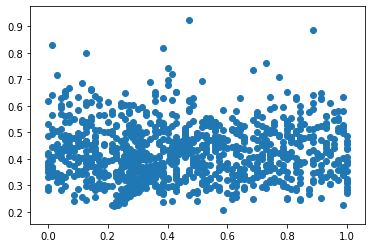

In [59]:
plt.scatter(traindf_Y_test,traindf_X_pred)

In [60]:
mean_squared_error(traindf_Y_test, traindf_X_pred)

0.019829183774208232

In [61]:
mean_absolute_error(traindf_Y_test, traindf_X_pred)

0.057209923681723084

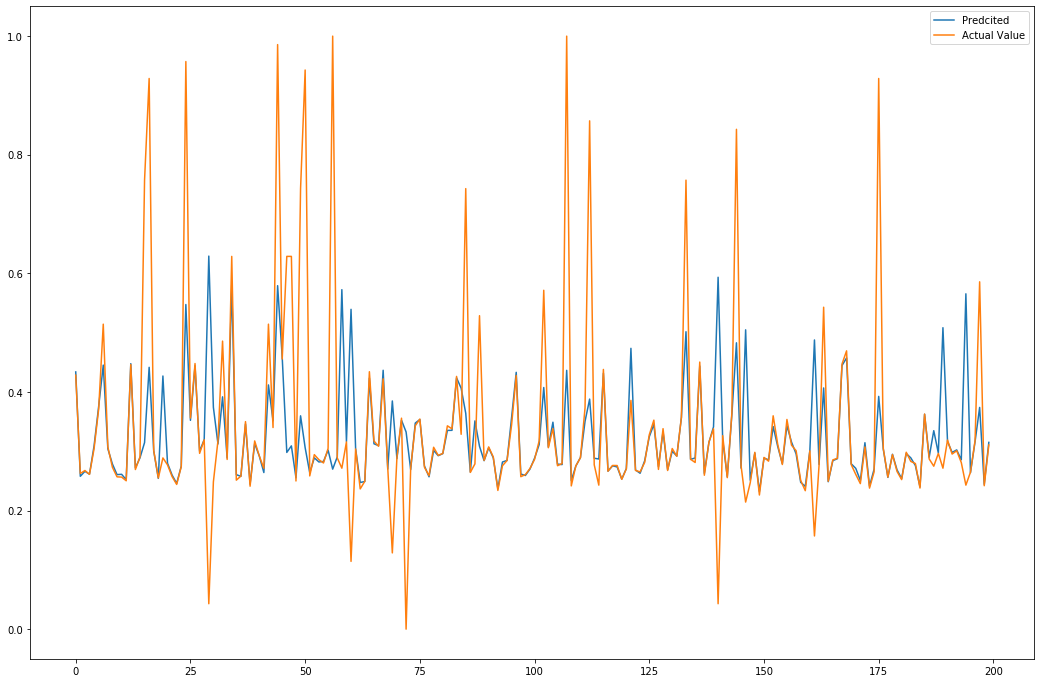

In [62]:
fig,ax = plt.subplots(1,1,figsize = (18,12))
ax.plot(traindf_X_pred[200:400], label = 'Predcited')
ax.plot(traindf_Y_test[200:400], label = 'Actual Value')
ax.legend()


<h1>Preprocessing the Test Dataset</h1>
<br>The preprocessing of the test dataset is done exactly similar to preproccesing of the training dataset, except we dont split the dataset here

In [63]:
testdf.head()

,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,Female,YES,2,Public,4,1,Diabetes,52,3,<200,Stage-01,388,153,196,240,85,53,17,3,1
1,Male,YES,2,Walk,4,1,Diabetes,53,11,<200,Stage-01,409,95,138,241,81,61,2,5,1
2,Female,YES,2,Car,4,1,Diabetes,35,9,<100,Stage-02,440,40,166,236,88,47,24,3,2
3,Female,YES,2,Car,4,1,None,31,12,<300,Elevated,206,78,83,211,87,52,13,6,2
4,Female,YES,2,Car,4,1,Diabetes,51,6,<200,Stage-01,229,109,207,312,94,68,39,5,1


In [64]:
testdf_X=testdf.iloc[:,:].values

In [65]:
labelEncoder_X=LabelEncoder()
testdf_X[:,0]=labelEncoder_X.fit_transform(testdf_X[:,0])
testdf_X[:,1]=labelEncoder_X.fit_transform(testdf_X[:,1])
for i in range(len(testdf_X)):
    testdf_X[i,9]=int(testdf_X[i,9][1:])


In [66]:
data=['Gender', 'Married', 'Children', 'Mode_transport', 'cases/1M',
       'Deaths/1M', 'comorbidity', 'Age', 'Coma score', 'Pulmonary score',
       'cardiological pressure', 'Diuresis', 'Platelets', 'HBB', 'd-dimer',
       'Heart rate', 'HDL cholesterol', 'Charlson Index', 'Blood Glucose',
       'FT/month']

In [67]:
testdf_X=pd.DataFrame(data=testdf_X,columns=data)#we change the traindf_X array back to dataframe to help in One hot encoding

In [68]:
testdf_X.head()

,Gender,Married,Children,Mode_transport,cases/1M,Deaths/1M,comorbidity,Age,Coma score,Pulmonary score,cardiological pressure,Diuresis,Platelets,HBB,d-dimer,Heart rate,HDL cholesterol,Charlson Index,Blood Glucose,FT/month
0,0,1,2,Public,4,1,Diabetes,52,3,200,Stage-01,388,153,196,240,85,53,17,3,1
1,1,1,2,Walk,4,1,Diabetes,53,11,200,Stage-01,409,95,138,241,81,61,2,5,1
2,0,1,2,Car,4,1,Diabetes,35,9,100,Stage-02,440,40,166,236,88,47,24,3,2
3,0,1,2,Car,4,1,None,31,12,300,Elevated,206,78,83,211,87,52,13,6,2
4,0,1,2,Car,4,1,Diabetes,51,6,200,Stage-01,229,109,207,312,94,68,39,5,1


In [69]:
def oneHotEncode(df,colNames):
    for col in colNames:
        if( df[col].dtype == np.dtype('object')):
            dummies = pd.get_dummies(df[col],prefix=col)
            df = pd.concat([df,dummies],axis=1)

            #drop the encoded column
            df.drop([col],axis = 1 , inplace=True)
    return df

In [70]:
testdf_X['Gender'] = pd.to_numeric(testdf_X['Gender'])
testdf_X['Married'] = pd.to_numeric(testdf_X['Married'])
testdf_X['Children'] = pd.to_numeric(testdf_X['Children'])
testdf_X['cases/1M'] = pd.to_numeric(testdf_X['cases/1M'])
testdf_X['Deaths/1M'] = pd.to_numeric(testdf_X['Deaths/1M'])
testdf_X['Age'] = pd.to_numeric(testdf_X['Age'])
testdf_X['Coma score'] = pd.to_numeric(testdf_X['Coma score'])
testdf_X['Pulmonary score'] = pd.to_numeric(testdf_X['Pulmonary score'])
testdf_X['Diuresis'] = pd.to_numeric(testdf_X['Diuresis'])
testdf_X['Platelets'] = pd.to_numeric(testdf_X['Platelets'])
testdf_X['HBB'] = pd.to_numeric(testdf_X['HBB'])
testdf_X['d-dimer'] = pd.to_numeric(testdf_X['d-dimer'])
testdf_X['Heart rate'] = pd.to_numeric(testdf_X['Heart rate'])
testdf_X['HDL cholesterol'] = pd.to_numeric(testdf_X['HDL cholesterol'])
testdf_X['Charlson Index'] = pd.to_numeric(testdf_X['Charlson Index'])
testdf_X['Blood Glucose'] = pd.to_numeric(testdf_X['Blood Glucose'])
testdf_X['FT/month'] = pd.to_numeric(testdf_X['FT/month'])

In [71]:
print('There were {} columns before encoding categorical features'.format(testdf_X.shape[1]))
testdf_X = oneHotEncode(testdf_X, data)
print('There are {} columns after encoding categorical features'.format(testdf_X.shape[1]))

There were 20 columns before encoding categorical features
There are 28 columns after encoding categorical features


In [72]:
from sklearn.preprocessing import MinMaxScaler

scaler1 = MinMaxScaler()

testdf_X = scaler1.fit_transform(testdf_X)


<h1>Predicting the probabilities for the test dataset and writing them in an excel file</h1>

In [73]:
testdf_X_pred=NN_model.predict(testdf_X)

In [76]:
temp = pd.read_excel("C:/Users/Dell/Desktop/Flipr ML/Test_dataset.xlsx", sheet_name = "Test_dataset")

In [77]:
tempIDs=temp.iloc[:,0].values

In [78]:
testdf_X_pred.max()

1.1654031

In [79]:
testdf_X_pred = scaler2.inverse_transform(testdf_X_pred)

In [81]:
import xlsxwriter 
  
workbook = xlsxwriter.Workbook('Q2_FliprLSTMTimeSeries.xlsx') 
worksheet = workbook.add_worksheet() 
  
# Start from the first cell. 
# Rows and columns are zero indexed. 
row = 1
row_id=0
column_id = 0
column=1
worksheet.write(0,0,'people_ID')
worksheet.write(0,1,'Infect_prob')
  
# iterating through content list 
for i in range(len(testdf_X_pred)) : 
  
    # write operation perform 
    worksheet.write(row, column_id, tempIDs[i])
    worksheet.write(row, column, testdf_X_pred[i]) 
  
    # incrementing the value of row by one 
    # with each iteratons. 
    row += 1
      
workbook.close() 